In [573]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pickle as pkl
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [574]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888-2023/main/lab3-modelling/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [575]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Use LabelEncoder to convert the label into numbers.

In [576]:
le = LabelEncoder()
df.y = le.fit_transform(df.y)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [577]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
Column "duration" must be deleted

In [578]:
df_dummies = pd.get_dummies(df)
#df_dummies = pd.get_dummies(df, columns = ["job","marital","default","housing","loan","contact","month","day_of_week","poutcome"])
df_dummies = df_dummies.drop(['duration'], axis=1)
#mapper = {'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'high.school': 5, 'university.degree': 6, 'professional.course': 7}
#df_dummies['education'] = df_dummies['education'].replace(mapper)
df_dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [579]:
df_dummies.isna().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

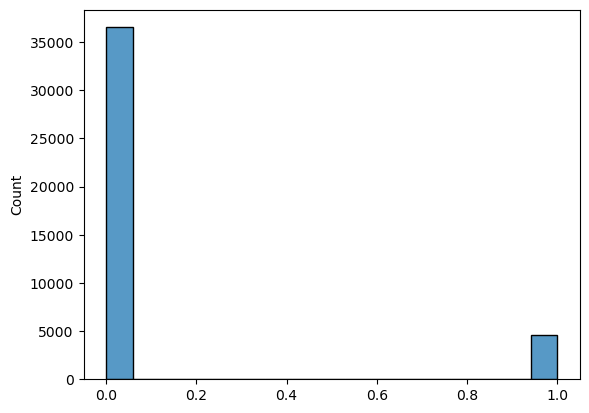

In [580]:
y = df_dummies.y.values
_ = sns.histplot(y, kde=False)

In [581]:
df_dummies['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [582]:
imbalace = 4640/(4640+36548)
imbalace

0.11265417111780131

In [583]:
train_set, test_set = train_test_split(df_dummies, test_size=0.20, random_state=50, stratify=y)
print(len(train_set), len(test_set))

32950 8238


In [601]:
df_train = train_set.copy()

x_df = df_train.copy()
x_df = x_df.drop(columns='y')
y_df = df_train['y'].copy()

In [616]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state=60) # 
scores = cross_val_score(clf, x_df, y_df, cv=10, scoring='f1')  # cross-validation

dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf, x_df, y_df, cv=10, scoring='f1')  # cross-validation

In [617]:
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))
print("Dummy F1: %.2f +/- %.2f" % (dummy_scores.mean(), dummy_scores.std()))

F1: 0.33 +/- 0.04
Dummy F1: 0.12 +/- 0.02


In [618]:
df_test = test_set.copy()
assert df_test.shape[1] == df_train.shape[1]

In [619]:
df_x = df_test.copy()
df_x = df_x.drop(columns='y')
df_y = df_test['y'].copy()

In [620]:
clf.fit(x_df, y_df)
test_predictions = clf.predict(df_x)

In [621]:
scores = cross_val_score(clf, df_x, df_y, cv=10, scoring='f1')
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.37 +/- 0.05


In [622]:
print(classification_report(df_y,test_predictions))
print(f1_score(df_y, test_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.24      0.36       928

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238

0.3581616481774961


## ----------------------------------------------------------------------------------------

In [559]:
x_df = train_set.copy()
x_df = x_df.drop(columns = 'y')
y_df = df_train['y'].copy()

df_x = test_set.copy()
df_x = df_x.drop(columns = 'y')
df_y = df_test['y'].copy()

In [552]:
# Scaling data
x_df_scaled = (x_df-x_df.min())/(x_df.max()-x_df.min())

In [564]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_df, y_df)
scores = cross_val_score(clf, x_df, y_df, cv=10, scoring='f1')  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.26 +/- 0.03


In [623]:
clf.fit(x_df, y_df)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
print("Feature ranking:")
feat_names = [col for col in x_df.columns]
#drop_pams = []
for f in range(x_df.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))
    #if (importances[indices[f]] < 0.05):
    #    drop_pams.append(feat_names[indices[f]])

[ 8  7  2 61  4  6  5  0  3  1 60 59 52 49 42 50 43 55 44 31 56 54 38 57
 36 10 23 48 22 58 14 28 33 17 34 53  9 39 18 30 41 27 21 25 32 45 16 13
 51 47 15 26 19 46 12 40 37 20 11 24 29 35]
Feature ranking:
1. nr.employed (0.146933)
2. euribor3m (0.142862)
3. pdays (0.093918)
4. poutcome_success (0.074663)
5. emp.var.rate (0.066610)
6. cons.conf.idx (0.065194)
7. cons.price.idx (0.053372)
8. age (0.044744)
9. previous (0.025034)
10. campaign (0.017224)
11. poutcome_nonexistent (0.016363)
12. poutcome_failure (0.015769)
13. month_oct (0.014927)
14. month_mar (0.014474)
15. contact_cellular (0.013814)
16. month_may (0.013082)
17. contact_telephone (0.012080)
18. day_of_week_mon (0.008207)
19. month_apr (0.007968)
20. education_university.degree (0.006273)
21. day_of_week_thu (0.005442)
22. day_of_week_fri (0.005422)
23. housing_yes (0.005376)
24. day_of_week_tue (0.005311)
25. housing_no (0.005295)
26. job_blue-collar (0.005134)
27. marital_single (0.005124)
28. month_jun (0.005032)
29. 

In [427]:
drop_pams.append('y')
print(drop_pams)

['cons.price.idx', 'campaign', 'education', 'previous', 'month_oct', 'poutcome_failure', 'contact_cellular', 'contact_telephone', 'poutcome_nonexistent', 'month_mar', 'day_of_week_mon', 'housing_yes', 'housing_no', 'marital_married', 'day_of_week_thu', 'month_apr', 'day_of_week_tue', 'month_may', 'marital_single', 'day_of_week_fri', 'job_admin.', 'day_of_week_wed', 'job_technician', 'loan_yes', 'loan_no', 'job_blue-collar', 'job_retired', 'month_jun', 'marital_divorced', 'job_student', 'default_no', 'default_unknown', 'job_management', 'job_services', 'job_self-employed', 'job_unemployed', 'job_housemaid', 'month_sep', 'month_nov', 'month_aug', 'month_jul', 'housing_unknown', 'job_entrepreneur', 'loan_unknown', 'job_unknown', 'month_dec', 'marital_unknown', 'default_yes', 'y']


In [428]:
x_df = train_set.copy()
x_df = x_df.drop(columns = drop_pams)
y_df = df_train['y'].copy()

df_x = test_set.copy()
df_x = df_x.drop(columns = drop_pams)
df_y = df_test['y'].copy()

In [547]:
print(f1_score(df_y, test_predictions))

0.3124477861319967


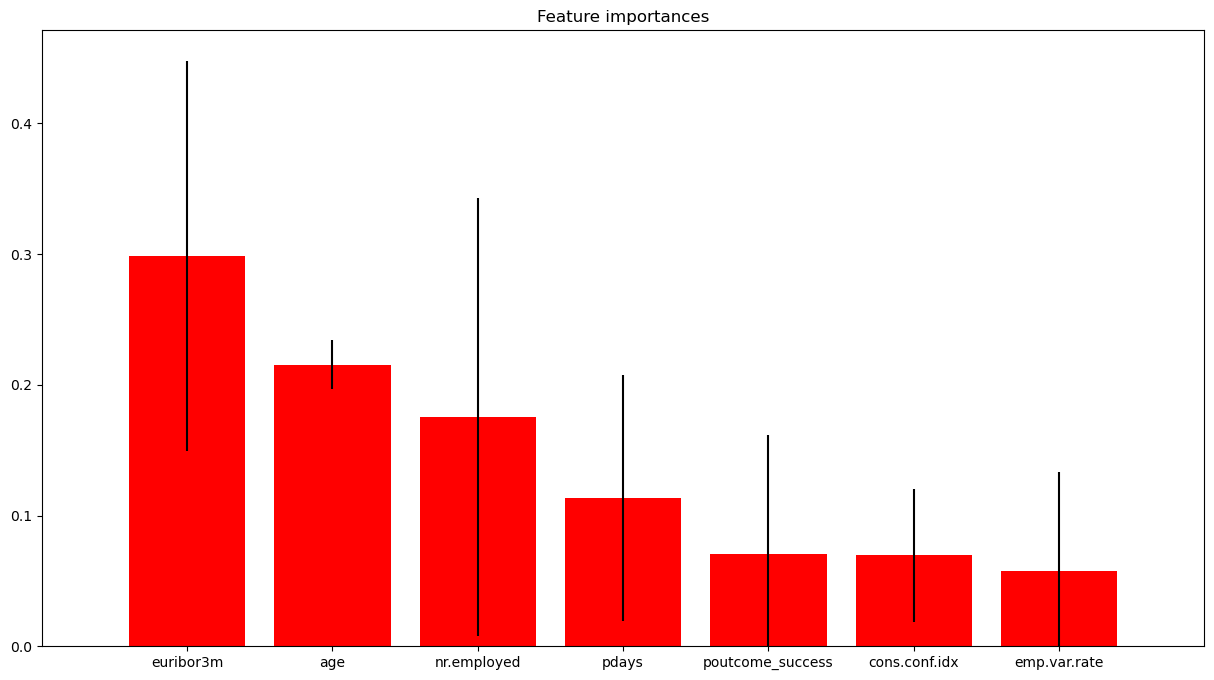

In [430]:
feat_names = [col for col in x_df.columns]
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x_df.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_df.shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, x_df.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

In [ ]:
#outp = open('model.pkl', 'wb')
#pkl.dump(clf, outp, -1)  # where clf is your classifier
#outp.close()